<class 'list'>
(178, 4, 5)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1]:
# Load a dataset
import pickle
import numpy as np
from sklearn import mixture
from segmentation import segmentation


#f = pickle.load(open('data/clustering_video_sexy_rake_1.pickle', 'rb'))
f = pickle.load(open('data/video_sexy_rake_hinge_2.pickle', 'rb'))

data = np.array(f)
#print(data[:,0,1])
f = data[:,:,:4]
print(f.shape)
key_points = f[:,:,:3]
key1 = np.zeros((f.shape[0],key_points.shape[2]))
key2 = np.zeros((f.shape[0],key_points.shape[2]))
key3 = np.zeros((f.shape[0],key_points.shape[2]))
key4 = np.zeros((f.shape[0],key_points.shape[2]))
time = []
for i in range(f.shape[0]):
    time.append(f[i][0,3])
time = np.array(time).reshape(len(time),)
for ii in range(key_points.shape[0]):
    for jj in range(key_points.shape[2]):
        key1[ii,jj] = key_points[ii,0,jj]
        key2[ii,jj] = key_points[ii,1,jj]
        key2[ii,jj] = key_points[ii,2,jj]
        key2[ii,jj] = key_points[ii,3,jj]
traj = np.column_stack((time,key1,key2,key3,key4))
np.random.seed(42)
n_cl = 3 # number of clusters
gmm = mixture.GaussianMixture(n_components=n_cl, covariance_type='full', reg_covar=10 ** -6).fit(traj)
idx, lik = segmentation(gmm,time,n_cl, return_lik=True)
print(idx)

f_new = np.zeros((f.shape[0],f.shape[1], f.shape[2]+1))
#print(f_new.shape)
for kk in range(f.shape[0]):
    if kk<idx[0]:
        f_new[kk] = np.column_stack((f[kk],np.zeros(f.shape[1])))
    elif kk<idx[1]:
        f_new[kk] = np.column_stack((f[kk],np.ones(f.shape[1])))
    else:
        f_new[kk] = np.column_stack((f[kk],np.ones(f.shape[2])))
#print(f_new[0])


(384, 4, 4)
[142 310]


ImportError: attempted relative import with no known parent package

384


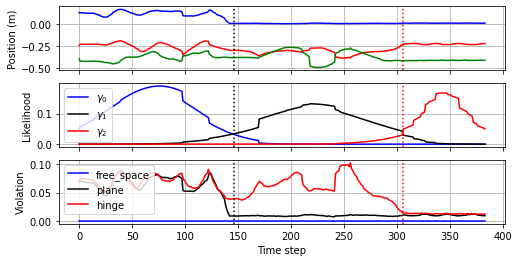

In [26]:
import matplotlib.pyplot as plt

# import the constraint fit results
violation = pickle.load(open('data/fit_results.pickle','rb'))
print(len(violation['data_infnorm']['free_space']))
key_mean = np.mean(key_points[:,:3,:], axis=1)
t = data[:,0,-2]


fig, axs = plt.subplots(3,1, sharex=True, figsize=(8,4))

axs[0].plot(key_mean[:,0],'r')
axs[0].plot(key_mean[:,1],'g')
axs[0].plot(key_mean[:,2],'b')
axs[0].set_ylabel("Position (m)")

cols = ['r', 'k', 'b']
modes = ['free_space', 'plane', 'hinge']
h = 0.1
for i in range(3):
    col = cols.pop()
    axs[1].plot(lik[:,i], color = col, label = f'$\gamma_{i}$')
    #axs[1].plot(h*(data[:,0,-1]==i), color = col)
    axs[2].plot(violation['data_infnorm'][modes[i]]/2, color = col, label=modes[i])
    
for i in range(3):
    axs[i].axvline(x = np.argmax(lik[:,1]>lik[:,0]), color = 'k', linestyle=':')
    axs[i].axvline(x = np.argmax(lik[:,2]>lik[:,1]), color = 'r', linestyle=':')
    
for i in range(3): axs[i].grid(True)
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')
axs[1].set_ylabel('Likelihood')
axs[2].set_ylabel('Violation')
axs[2].set_xlabel('Time step')

plt.savefig('segmenting_results.pdf')

In [22]:
fit_quality = pickle.load(open('data/constraint_selection.pickle','rb'))
print(fit_quality)
s = 'Model & '

for model in fit_quality:
    s += 'D '+ model + ' & '
s += ' \\\ \n \\hline \n'
for model in fit_quality:
    s += model + ' &  '
    for res in fit_quality[model]:
        s += f"{float(res):3.2f}" + ' & '
    s += ' \\\ \n'
print(s)

{'free': [0.0, 0.0, 0.0, 0.0], 'point': [DM(1.76535), DM(0.180636), DM(0.906541), DM(0.052993)], 'line': [DM(3.07184), DM(4.60579), DM(1.69017), DM(20.4988)], 'hinge': [DM(9.16509), DM(9.1085), DM(12.2711), DM(0.386446)]}
Model & D free & D point & D line & D hinge &  \\ 
 \hline 
free &  0.00 & 0.00 & 0.00 & 0.00 &  \\ 
point &  1.77 & 0.18 & 0.91 & 0.05 &  \\ 
line &  3.07 & 4.61 & 1.69 & 20.50 &  \\ 
hinge &  9.17 & 9.11 & 12.27 & 0.39 &  \\ 

